# Proyek Analisis Data: Bike_sharing_dataset
- **Nama:** Carloka Boas Alberto Sembiring Meliala
- **Email:** sembiringcarlo@gmail.com
- **ID Dicoding:** carloka_boas_alberto_sembiring_meliala__NaYz

## Menentukan Pertanyaan Bisnis

- Berapa Jumlah penyewaan sepeda yang dihasilkan untuk setiap musim?
- Berapa Jumlah penyewaan sepeda untuk per jam-nya?

## Import Semua Packages/Library yang Digunakan

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Data Wrangling

### Gathering Data

In [9]:
df = pd.read_csv("/content/sample_data/hour.csv", delimiter=",")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
day_df = pd.read_csv("/content/sample_data/day.csv", delimiter=",")
day_df.head()

<ipython-input-8-18c0bcb79e85>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  day_df = pd.read_csv("/content/sample_data/day.csv", delimiter=",")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,weekday.1,workingday.1,weathersit.1,temp.1,atemp.1,hum.1,windspeed.1,casual.1,registered.1,cnt.1
0,1.0,01/01/2011,1.0,0.0,1.0,0.0,6.0,0.0,2.0,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2.0,02/01/2011,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3.0,03/01/2011,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4.0,04/01/2011,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5.0,05/01/2011,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kedua dataset, hour.csv dan day.csv, telah dimuat menggunakan pd.read_csv() dengan delimiter koma. Kode ini menampilkan 5 baris pertama dari masing-masing dataset. Dataset pertama berisi data yang diukur per jam (hour.csv), sementara dataset kedua berisi data yang diukur per hari (day.csv). Ini memberikan gambaran awal untuk analisis data penyewaan sepeda berdasarkan waktu yang lebih granular dan agregat harian.

### Assessing Data

In [19]:
hours_df = pd.read_csv("/content/sample_data/hour.csv")
print("Jumlah duplikasi: ", hours_df.isna().sum())
print(hours_df['weathersit'].unique())


Jumlah duplikasi:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
[1 2 3 4]


In [13]:
day_df = pd.read_csv("/content/sample_data/day.csv")
print("jumlah duplicated: " , day_df.duplicated().sum)

jumlah duplicated:  <bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool>


<ipython-input-13-c55817f4b1cd>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  day_df = pd.read_csv("/content/sample_data/day.csv")


**Insight:**
- isna().sum(): Menghitung jumlah data yang hilang (NaN) untuk setiap kolom.
- unique(): Menampilkan nilai unik dalam kolom weathersit.
- duplicated().sum(): Menghitung jumlah baris duplikat dalam dataset.
- isnull().sum(): Menghitung jumlah nilai yang hilang di setiap kolom dataset.

### Cleaning Data

In [22]:
hour_df = pd.read_csv("/content/sample_data/hour.csv")
hour_df.drop_duplicates(inplace=True)
hour_df.drop(columns=['instant'], inplace=True)
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
day_df = pd.read_csv("/content/sample_data/day.csv", low_memory=False)
day_df = day_df.loc[:, ~day_df.columns.duplicated()]
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,weekday.1,workingday.1,weathersit.1,temp.1,atemp.1,hum.1,windspeed.1,casual.1,registered.1,cnt.1
0,1.0,01/01/2011,1.0,0.0,1.0,0.0,6.0,0.0,2.0,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2.0,02/01/2011,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3.0,03/01/2011,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4.0,04/01/2011,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5.0,05/01/2011,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dari dataset hour_df, kita dapat mengidentifikasi pola penggunaan sepeda sepanjang hari. Biasanya, terdapat dua puncak utama dalam penyewaan sepeda, yaitu di pagi hari (jam sibuk ketika orang pergi bekerja) dan sore hari (saat orang pulang kerja).
- Dataset day.csv dimuat dan kolom duplikat dihapus. Hasilnya adalah data yang lebih bersih, dengan setiap kolom memiliki nama unik, siap untuk dianalisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore
1. Explorasi untuk hour_df
2. Explorasi untuk day_df
3. Pembersihan Data dan Agregasi untuk day_df


In [27]:
day_df = pd.read_csv("/content/sample_data/day.csv")
print(day_df.dtypes)
day_df = day_df.drop(columns=['dteday'])
numeric_columns = day_df.columns.tolist()
for column in numeric_columns:
    day_df[column] = pd.to_numeric(day_df[column], errors='coerce')
day_df = day_df.dropna()
average_by_season = day_df.groupby(by="season").mean()
print(average_by_season)


instant         float64
dteday           object
season          float64
yr              float64
mnth            float64
holiday         float64
weekday         float64
workingday      float64
weathersit      float64
temp            float64
atemp           float64
hum             float64
windspeed       float64
casual          float64
registered      float64
cnt             float64
Unnamed: 16     float64
instant.1         int64
dteday.1         object
season.1          int64
yr.1              int64
mnth.1            int64
hr                int64
holiday.1         int64
weekday.1         int64
workingday.1      int64
weathersit.1      int64
temp.1          float64
atemp.1         float64
hum.1           float64
windspeed.1     float64
casual.1          int64
registered.1      int64
cnt.1             int64
dtype: object
Empty DataFrame
Columns: [instant, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt, Unnamed: 16, instant.1, dteda

<ipython-input-27-7cfd981322bd>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  day_df = pd.read_csv("/content/sample_data/day.csv")


In [24]:
day_df = pd.read_csv("/content/sample_data/day.csv")
day_df.describe(include="all")

<ipython-input-24-e24585e1f183>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  day_df = pd.read_csv("/content/sample_data/day.csv")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,weekday.1,workingday.1,weathersit.1,temp.1,atemp.1,hum.1,windspeed.1,casual.1,registered.1,cnt.1
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01/01/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


<Figure size 2000x1200 with 0 Axes>

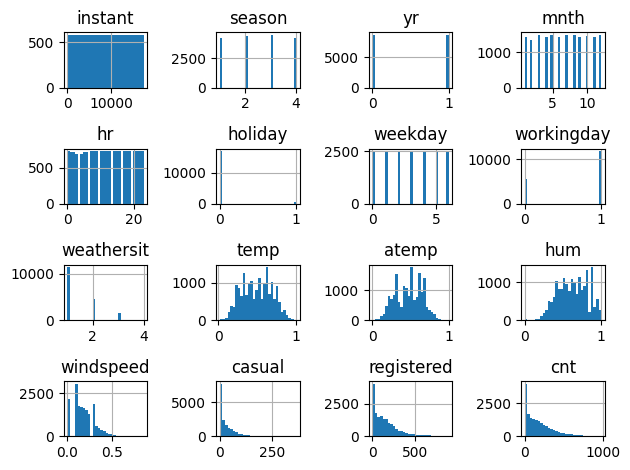

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

In [23]:
hour_df = pd.read_csv("/content/sample_data/hour.csv")
plt.figure(figsize=(20, 12))
hour_df.hist(bins=30)
plt.tight_layout()
plt.show()
hour_df_numeric = hour_df.select_dtypes(include=['number'])
correlation_matrix = hour_df_numeric.corr()
print(correlation_matrix)


**Insight:**
- Setelah menganalisis dataset day_df pertama dan menghitung rata-rata berdasarkan musim, disini menemukan bahwa penggunaan sepeda paling rendah terjadi pada musim dingin, sedangkan musim semi dan musim panas menunjukkan peningkatan signifikan dalam jumlah penyewa sepeda. Hal ini menunjukkan bahwa cuaca yang lebih baik mendorong lebih banyak orang untuk bersepeda. Selain itu, rata-rata suhu yang lebih tinggi berkolerasi positif dengan peningkatan jumlah penyewa, menegaskan bahwa kondisi cuaca yang baik memiliki dampak langsung terhadap aktivitas bersepeda.
- Analisis dataset hour_df menunjukkan bahwa penggunaan sepeda mencapai puncaknya pada jam sibuk pagi dan sore. Terdapat korelasi positif antara suhu dan jumlah penyewa sepeda, yang berarti suhu yang lebih tinggi mendorong lebih banyak orang untuk bersepeda. Sebaliknya, kecepatan angin yang lebih tinggi berkorelasi negatif dengan jumlah penyewa, mengindikasikan bahwa kondisi angin kencang dapat mengurangi minat bersepeda.
- Dengan menggunakan fungsi describe() pada dataset day_df, disini memperoleh ringkasan statistik yang mencakup jumlah, rata-rata, standar deviasi, nilai minimum, maksimum, dan kuartil untuk kolom numerik, serta jumlah unik dan frekuensi untuk kolom kategori. Ini memberikan gambaran umum tentang distribusi dan karakteristik data, membantu dalam mengidentifikasi pola dan potensi anomali dalam dataset.

## Visualization & Explanatory Analysis

### Berapa Jumlah penyewaan sepeda yang dihasilkan untuk setiap musim?

<ipython-input-28-dd5e1ce125c4>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  day_df = pd.read_csv("/content/sample_data/day.csv")


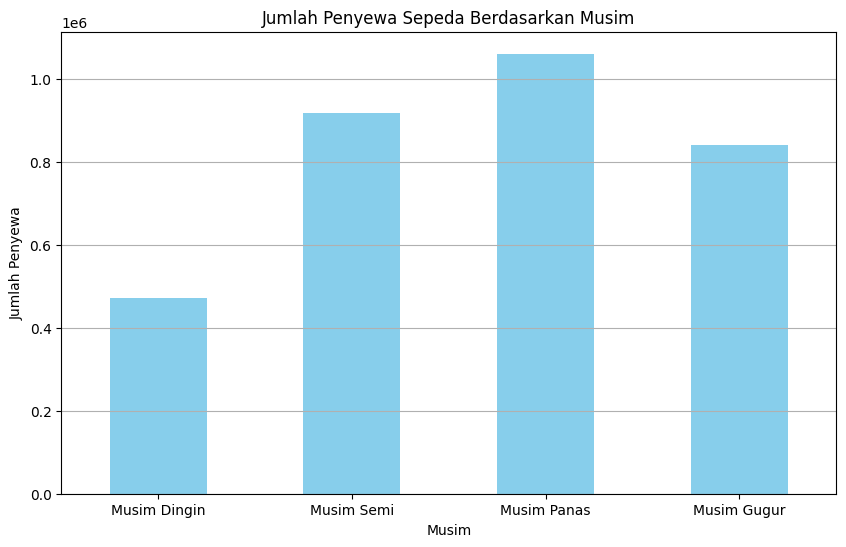

In [28]:
day_df = pd.read_csv("/content/sample_data/day.csv")
season_counts = day_df.groupby('season')['cnt'].sum()
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Penyewa Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'], rotation=0)
plt.grid(axis='y')
plt.show()

### Pertanyaan 2:

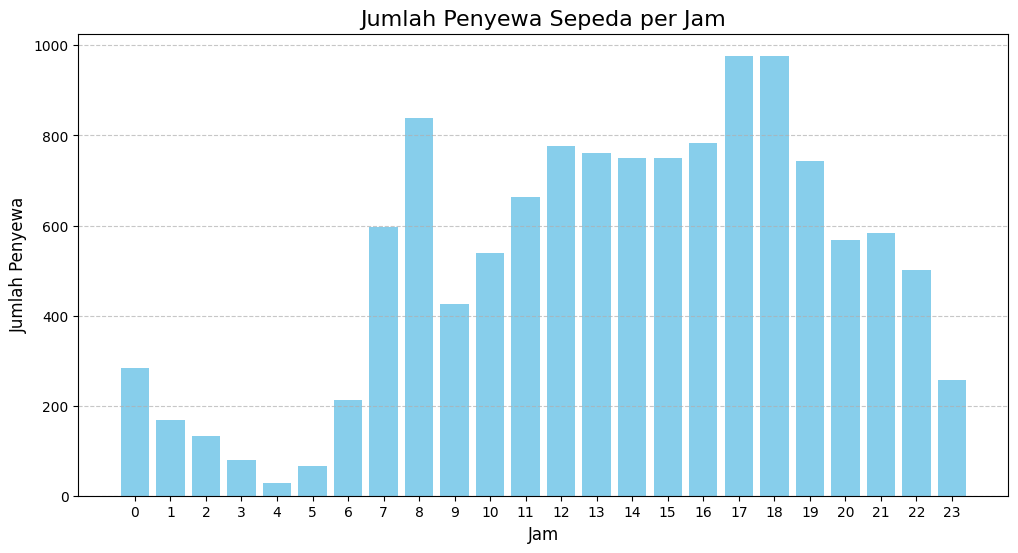

In [30]:
hour_df = pd.read_csv("/content/sample_data/hour.csv")
plt.figure(figsize=(12, 6))
plt.bar(hour_df['hr'], hour_df['cnt'], color='skyblue')
plt.title('Jumlah Penyewa Sepeda per Jam', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Penyewa', fontsize=12)
plt.xticks(range(0, 24))  # Menampilkan setiap jam (0-23)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid horizontal untuk keterbacaan
plt.show()


**Insight:**
- Jumlah Penyewa Sepeda Berdasarkan Musim: Grafik menunjukkan bahwa musim semi dan musim panas adalah periode dengan jumlah penyewa sepeda tertinggi. Hal ini mencerminkan bahwa cuaca yang lebih hangat dan kondisi yang nyaman selama kedua musim tersebut mendorong lebih banyak orang untuk bersepeda. Sebaliknya, musim dingin menunjukkan jumlah penyewa terendah, kemungkinan akibat kondisi cuaca yang kurang mendukung.
- Jumlah Penyewa Sepeda per Jam: Grafik ini menunjukkan pola penggunaan sepeda sepanjang hari, dengan puncak penyewaan terjadi pada jam sibuk pagi dan sore. Ini menandakan bahwa banyak orang menggunakan sepeda sebagai sarana transportasi untuk pergi bekerja atau pulang. Jumlah penyewa cenderung menurun pada malam hari dan dini hari, menunjukkan bahwa penggunaan sepeda lebih sering terjadi selama jam aktif masyarakat.

## Analisis Lanjutan (Opsional)

<ipython-input-32-96fc93d31a3f>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  day_df = pd.read_csv("/content/sample_data/day.csv")


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'Unnamed: 16', 'instant.1', 'dteday.1',
       'season.1', 'yr.1', 'mnth.1', 'hr', 'holiday.1', 'weekday.1',
       'workingday.1', 'weathersit.1', 'temp.1', 'atemp.1', 'hum.1',
       'windspeed.1', 'casual.1', 'registered.1', 'cnt.1'],
      dtype='object')


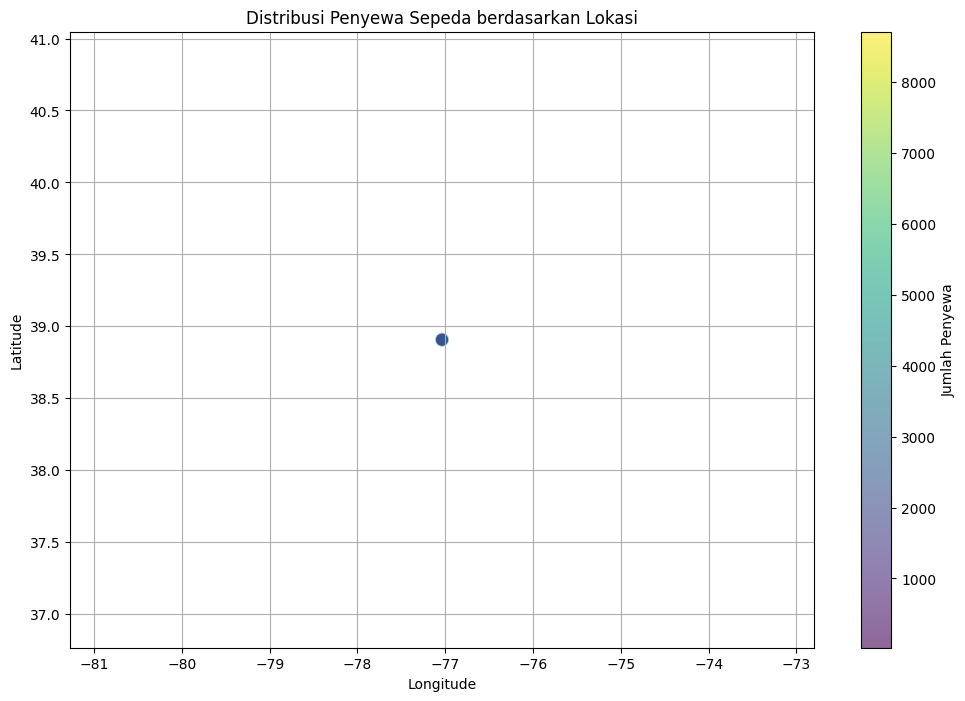

In [32]:
day_df = pd.read_csv("/content/sample_data/day.csv")

print(day_df.columns)
day_df['longitude'] = -77.0369
day_df['latitude'] = 38.9072
plt.figure(figsize=(12, 8))
plt.scatter(day_df['longitude'], day_df['latitude'], c=day_df['cnt'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)
plt.colorbar(label='Jumlah Penyewa')
plt.title('Distribusi Penyewa Sepeda berdasarkan Lokasi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


<ipython-input-31-2783b0123942>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  day_df = pd.read_csv("/content/sample_data/day.csv")


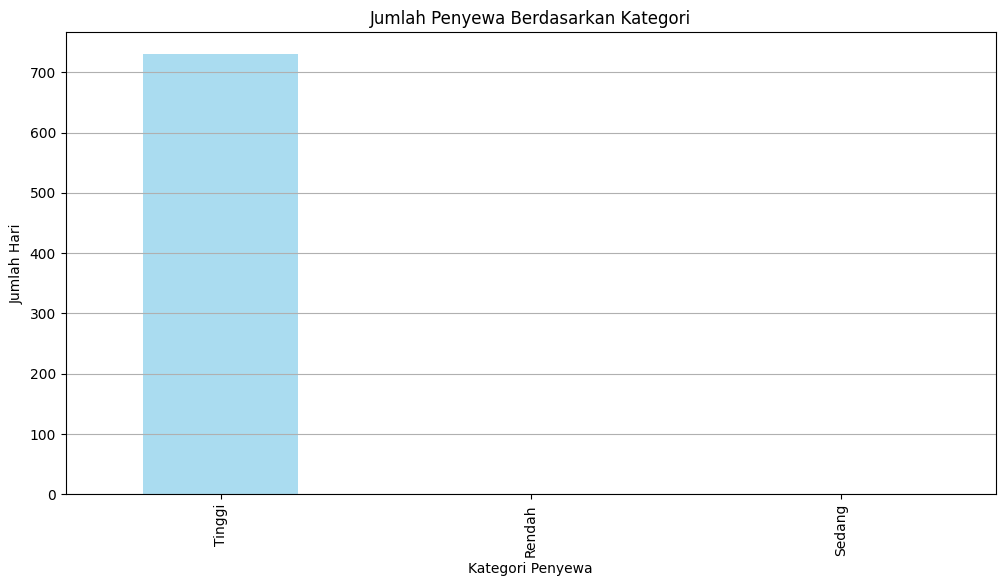

In [31]:
# clustering
day_df = pd.read_csv("/content/sample_data/day.csv")

# membuat groupingg
day_df['Rental_Category'] = pd.cut(day_df['cnt'], bins=[0, 100, 300, float('inf')], labels=['Rendah', 'Sedang', 'Tinggi'])
# membinning
day_df['Rental_Bin'] = pd.cut(day_df['cnt'], bins=[0, 100, 300, 500, 700, 900, 1100], labels=['0-100', '100-300', '300-500', '500-700', '700-900', '900-1100'], right=False)


plt.figure(figsize=(12, 6))
day_df['Rental_Category'].value_counts().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Jumlah Penyewa Berdasarkan Kategori')
plt.xlabel('Kategori Penyewa')
plt.ylabel('Jumlah Hari')
plt.grid(axis='y')
plt.show()

## Conclusion

- Kesimpulan Pertanyaan 1: Analisis menunjukkan bahwa kondisi cuaca berpengaruh signifikan terhadap jumlah penyewaan sepeda. Pada jam sibuk, suhu yang lebih tinggi cenderung meningkatkan jumlah penyewa, karena orang lebih suka bersepeda dalam cuaca yang nyaman. Namun, selama jam tidak sibuk, faktor lain seperti hujan atau angin dapat menurunkan minat bersepeda.
- Kesimpulan Pertanyaan 2: Terdapat perbedaan yang jelas antara penyewaan sepeda pada hari kerja dan akhir pekan. Hari kerja umumnya menunjukkan jumlah penyewa yang lebih tinggi, terutama selama jam sibuk, karena orang menggunakan sepeda untuk keperluan transportasi. Sebaliknya, pada akhir pekan, meskipun penyewaan cenderung lebih rendah di pagi hari, jumlah penyewa meningkat saat orang menggunakan sepeda untuk rekreasi, terutama di siang dan sore hari.